# 导入依赖库

In [43]:
import json
from utils import backtest, plot_cumulative_returns
from strats import BaseStrategy

# 参数配置

In [44]:
reb_dict_path = 'data/reb_dict.json'  # 调仓字典路径

# 策略

In [45]:
class ETFWeekly(BaseStrategy):
    params = (
        ('selection_dict', {}),
    )

    def __init__(self):
        self.sel = self.p.selection_dict

    def next(self):
        dt = self.datas[0].datetime.date(0).strftime('%Y-%m-%d')
        if dt in self.sel:
            reb_dict = self.sel[dt]
            selected = list(reb_dict.keys())

            # 平掉未被选中的持仓ETF
            for d in self.datas:
                if d._name not in selected and self.getposition(d).size:
                    self.close(d)

            # 建仓或调仓被选中的ETF
            for code in selected:
                target_pct = 0.99 * reb_dict[code]
                d = self.getdatabyname(code)
                self.order_target_percent(d, target=target_pct)

# 回测

In [46]:
# 获取调仓字典
with open(reb_dict_path, 'r') as f:
    reb_dict = json.load(f)

In [47]:
# 获取回测起点和终点
start = min(reb_dict.keys())
end = max(reb_dict.keys())

In [48]:
# 回测
train_strat_return, train_bench_return = backtest(
    ETFWeekly, selection_dict=reb_dict, start_date=start, end_date=end, printlog=False
)

基准收益率: 3.37%
收益率: 4.97%
年化收益率: 13.19%
最大回撤: 13.08%
交易次数: 156
胜率: 58.90%


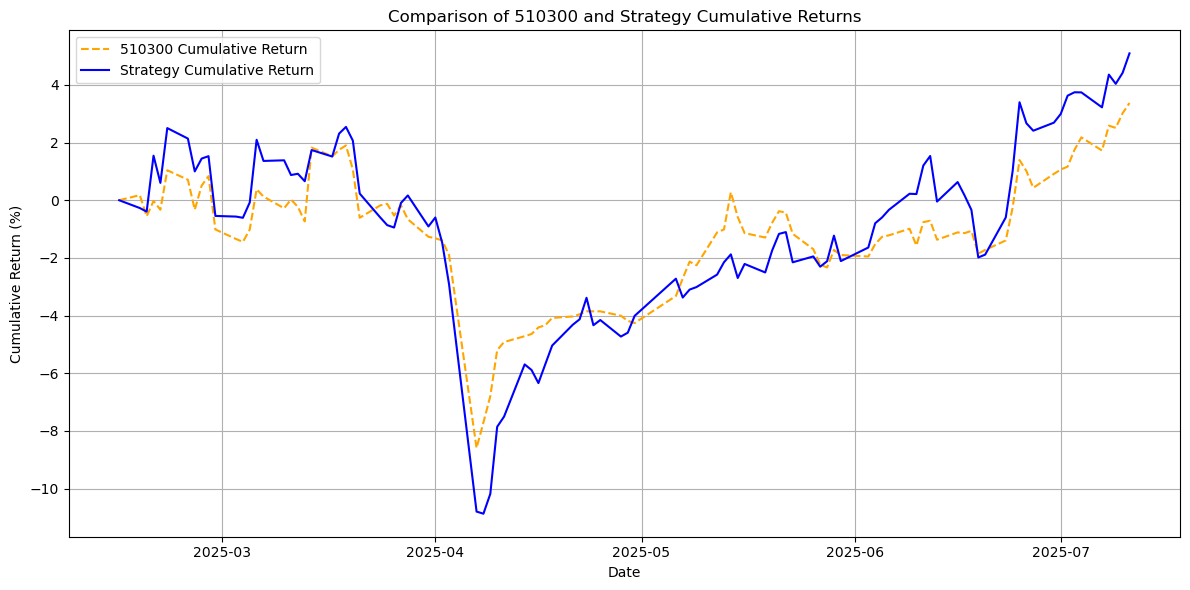

In [49]:
plot_cumulative_returns(train_strat_return)